### 고령자 사고의 사망률이 비고령자 대비 유의미하게 높다.

귀무가설(H0): 고령자 사고의 사망률은 비고령자 사고의 사망률과 차이가 없다.
<br>
<br>
대립가설(H1): 고령자 사고의 사망률은 비고령자 사고의 사망률과 차이가 있다.

In [1]:
# 라이브러리 호출 및 plot 설정
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import warnings

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

In [2]:
df_casualties = pd.read_excel('../../data/preprocessed_data/연령층별_월별_사상자_전처리ver.xlsx', header=[0, 1])
df_casualties
# HTML(df_casualties.head(5).to_html())

연령       사고년도    2020    2021    2022    2023    2024   2020         \
       연령       사고년도      합계      합계      합계      합계      합계    01월    02월   
0       합계     사망[명]    3081    2916    2735    2551    2521    277    222   
1       합계     부상[명]  306194  291608  281803  283799  278482  25442  23558   
2       합계  (중상자[명])   60564   55905   51715   52989   51553   5063   4463   
3       합계  (경상자[명])  226036  219283  212430  211569  207271  18696  17530   
4    12세이하     사망[명]      24      23      18      14      12      4      2   
5    12세이하     부상[명]   10500   10978   11389   10910   11319    956    612   
6    12세이하  (중상자[명])    1128    1139    1147     993    1105     83     56   
7    12세이하  (경상자[명])    8278    8776    8973    8665    8851    754    495   
8   13-20세     사망[명]     103      93      81      65      62      8      6   
9   13-20세     부상[명]   16923   15103   13497   12796   12312   1393   1291   
10  13-20세  (중상자[명])    2837    2538    2247    2162    2167    221    209   
11  13-20세  (경상자[명])   12240   11070    9795    9147    8541   1019    917   
12  21-30세     사망[명]     261     269     225     187     181     21     19   
13  21-30세     부상[명]   57256   54830   50927   47239   43711   4571   4485   
14  21-30세  (중상자[명])    7984    7155    6300    6027    5549    618    592   
15  21-30세  (경상자[명])   45162   44271   41351   37778   34789   3598   3550   
16  31-40세     사망[명]     221     223     195     168     174     21     16   
17  31-40세     부상[명]   54491   51868   49943   50482   49658   4597   4371   
18  31-40세  (중상자[명])    8314    7529    6649    6840    6486    677    634   
19  31-40세  (경상자[명])   43035   41756   40525   40635   40053   3671   3477   
20  41-50세     사망[명]     316     314     262     227     219     28     33   
21  41-50세     부상[명]   53346   50553   48657   50184   49193   4472   4275   
22  41-50세  (중상자[명])    9642    8741    7644    8030    7678    809    775   
23  41-50세  (경상자[명])   40743   39410   38284   39109   38497   3418   3240   
24  51-60세     사망[명]     550     470     442     414     352     43     48   
25  51-60세     부상[명]   56520   51746   49152   49378   48171   4776   4466   
26  51-60세  (중상자[명])   12055   10918    9664    9706    9366   1057    910   
27  51-60세  (경상자[명])   41357   38231   36787   36668   35828   3441   3326   
28  61-64세     사망[명]     263     229     254     235     222     22     10   
29  61-64세     부상[명]   18937   18600   18968   19748   19487   1591   1402   
30  61-64세  (중상자[명])    4630    4358    4444    4544    4336    388    344   
31  61-64세  (경상자[명])   13292   13358   13518   14023   13908   1099    981   
32  65-70세     사망[명]     349     319     359     380     349     30     21   
33  65-70세     부상[명]   17867   17997   19103   20684   21535   1367   1284   
34  65-70세  (중상자[명])    5190    5012    5220    5558    5635    405    375   
35  65-70세  (경상자[명])   11679   12093   12792   13879   14600    877    834   
36   71세이상     사망[명]     993     976     899     860     950    100     67   
37   71세이상     부상[명]   20280   19897   20089   22321   23029   1715   1364   
38   71세이상  (중상자[명])    8778    8508    8396    9126    9224    805    568   
39   71세이상  (경상자[명])   10218   10294   10388   11647   12188    817    710   
40      불명     사망[명]       1       0       0       1       0      0      0   
41      불명     부상[명]      74      36      78      57      67      4      8   
42      불명  (중상자[명])       6       7       4       3       7      0      0   
43      불명  (경상자[명])      32      24      17      18      16      2      0   

           ...   2024                                                          \
      03월  ...    03월    04월    05월    06월    07월    08월    09월    10월    11월   
0     239  ...    172    197    229    217    197    241    254    225    229   
1   21823  ...  22373  23138  25238  23619  22980  24501  24049  24983  24414   
2    4356  ...   3989   4358   4752   4480   4193   4367   4558   4777   4585   
3   16155  ..

In [3]:
# 전체 연령 값 확인
all_ages = df_casualties[('연령 ', '연령 ')].unique().tolist()
all_ages

['합계',
 '12세이하',
 '13-20세',
 '21-30세',
 '31-40세',
 '41-50세',
 '51-60세',
 '61-64세',
 '65-70세',
 '71세이상',
 '불명']

In [4]:
# 연령 구분
elderly = ['65-70세', '71세이상']
non_elderly = ['12세이하', '13-20세', '21-30세', '31-40세', '41-50세', '51-60세', '61-64세']
year_cols = [('2020', '합계'), ('2021', '합계'), ('2022', '합계'), ('2023', '합계'), ('2024', '합계')]

# 사망자 데이터 필터링
df_death = df_casualties[(df_casualties[('사고년도', '사고년도')] == '사망[명]') &
              (df_casualties[('연령 ', '연령 ')].isin(elderly + non_elderly))]
death_summary = df_death.groupby(('연령 ', '연령 '))[year_cols].sum()

# 부상자 데이터 필터링
df_injury = df_casualties[(df_casualties[('사고년도', '사고년도')] == '부상[명]') &
               (df_casualties[('연령 ', '연령 ')].isin(elderly + non_elderly))]
injury_summary = df_injury.groupby(('연령 ', '연령 '))[year_cols].sum()

# 사망자 수 계산
elderly_deaths = death_summary.loc[elderly].sum().sum()
non_elderly_deaths = death_summary.loc[non_elderly].sum().sum()

# 사고 수 계산 (사망자 + 부상자)
elderly_accidents = elderly_deaths + injury_summary.loc[elderly].sum().sum()
non_elderly_accidents = non_elderly_deaths + injury_summary.loc[non_elderly].sum().sum()

# 사망률 계산
elderly_rate = elderly_deaths / elderly_accidents
non_elderly_rate = non_elderly_deaths / non_elderly_accidents

# 출력용 정리
summary_df = pd.DataFrame({
    '구분': ['고령자', '비고령자'],
    '사망자 수': [f"{elderly_deaths:,}명", f"{non_elderly_deaths:,}명"],
    '사고 수': [f"{elderly_accidents:,}건", f"{non_elderly_accidents:,}건"],
    '사망률 (%)': [f"{elderly_rate * 100:.2f}%", f"{non_elderly_rate * 100:.2f}%"]
})

print(summary_df)


     구분   사망자 수        사고 수 사망률 (%)
0   고령자  6,434명    209,236건   3.07%
1  비고령자  7,368명  1,246,140건   0.59%


In [5]:
# 시각화를 위한 raw 수치 준비
viz_df = pd.DataFrame({
    '구분': ['고령자', '비고령자'],
    '사망자 수': [elderly_deaths, non_elderly_deaths],
    '사고 수': [elderly_accidents, non_elderly_accidents],
    '사망률 (%)': [elderly_rate * 100, non_elderly_rate * 100]
})

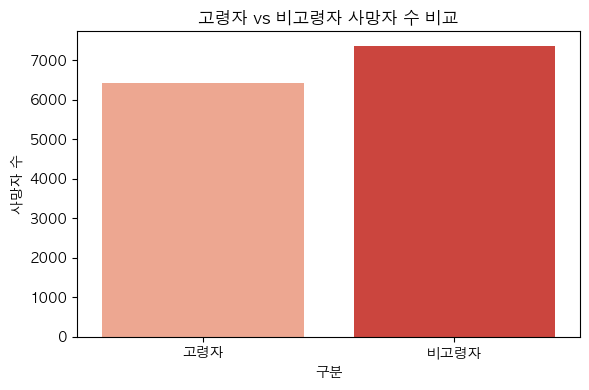

<Figure size 640x480 with 0 Axes>

In [ ]:
# 1. 사망자 수 비교
plt.figure(figsize=(6, 4))
sns.barplot(data=viz_df, x='구분', y='사망자 수', palette='Reds')
plt.title('고령자 vs 비고령자 사망자 수 비교')
plt.ylabel('사망자 수')
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_4/고령자_비고령자_사망자수_비교.png'
# plt.savefig(save_path)

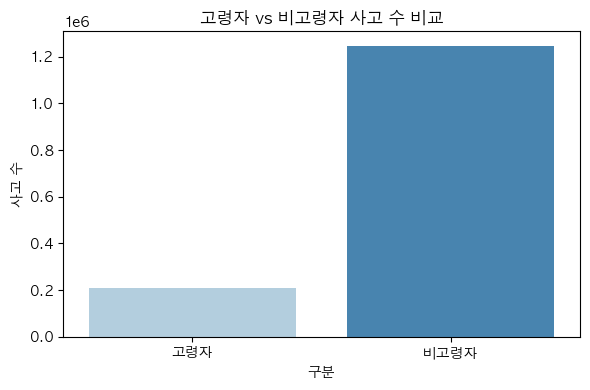

<Figure size 640x480 with 0 Axes>

In [ ]:
# 2. 사고 수 비교
plt.figure(figsize=(6, 4))
sns.barplot(data=viz_df, x='구분', y='사고 수', palette='Blues')
plt.title('고령자 vs 비고령자 사고 수 비교')
plt.ylabel('사고 수')
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_4/고령자_비고령자_사고수_비교.png'
# plt.savefig(save_path)

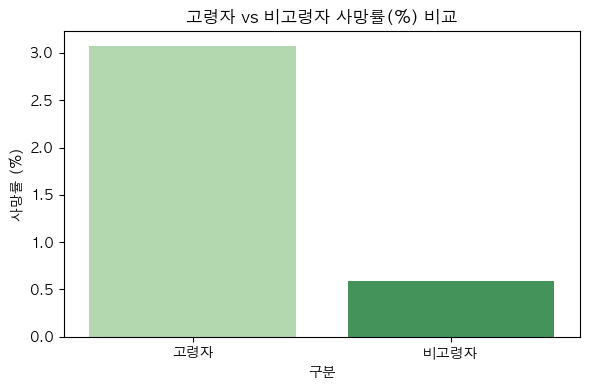

<Figure size 640x480 with 0 Axes>

In [ ]:
# 3. 사망률(%) 비교
plt.figure(figsize=(6, 4))
sns.barplot(data=viz_df, x='구분', y='사망률 (%)', palette='Greens')
plt.title('고령자 vs 비고령자 사망률(%) 비교')
plt.ylabel('사망률 (%)')
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_4/고령자_비고령자_사망률_비교.png'
# plt.savefig(save_path)

In [ ]:
# 사망자 수와 사고 수 (각 집단의 성공/시도 수)
counts = [elderly_deaths, non_elderly_deaths]
nobs = [elderly_accidents, non_elderly_accidents]

# 이항 비율 검정 수행
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs)
# 결과 출력
print(f"Z-통계량: {z_stat:.2f}")
print(f"p-값: {p_value:.10f}")

# ==================================================
# 일반적으로 |Z| > 1.96이면 유의수준 0.05에서 유의하다고 판단
# Z-통계량이 108.47이므로 유의수준 0.05에서 유의하다고 판단
# p-value는 0.0000이므로, 회귀계수가 유의미
# 귀무가설 기각
# ==================================================

Z-통계량: 108.47
p-값: 0.0000000000


In [ ]:
# 연령대별 사망률 계산을 위한 사망자·부상자 데이터가 있는 상태에서 분석 수행

# 연령대 목록
age_groups = elderly + non_elderly

# 연령대별 사망자 수
death_per_age = death_summary.loc[age_groups][year_cols].sum(axis=1)

# 연령대별 사고 수 = 사망자 수 + 부상자 수
injury_per_age = injury_summary.loc[age_groups][year_cols].sum(axis=1)
accident_per_age = death_per_age + injury_per_age

# 연령대별 사망률 계산
death_rate_per_age = (death_per_age / accident_per_age).reset_index()
death_rate_per_age.columns = ['연령', '사망률']

# 고령자 여부 추가
death_rate_per_age['is_elderly'] = death_rate_per_age['연령'].apply(lambda x: 1 if x in elderly else 0)

# OLS 분석
X = sm.add_constant(death_rate_per_age['is_elderly'])
y = death_rate_per_age['사망률']
model = sm.OLS(y, X).fit()
model.summary()

# ==================================================================
# const: 0.0060 > 비고령자의 평균 사망률: 0.6%
# is_elderly: 0.0241 > 고령자일 경우 사망률이 평균 2.41% 증가
# 고령자 사망률: 0.6 + 2.41 = 3.01%로 추정

# R-squared: 0.704 > 고령자 여부 하나만으로 약 70.4%의 사망률 변동을 설명 가능
# Adj. R-squared: 0.662 > 자유도 수정 후 66.2%

# P > |t|(is_elderly)가 0.005이므로 통계적으로 유의미
# 귀무가설 기각
# ==================================================================

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    사망률   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     16.67
Date:                Mon, 02 Jun 2025   Prob (F-statistic):            0.00467
Time:                        14:44:35   Log-Likelihood:                 32.565
No. Observations:                   9   AIC:                            -61.13
Df Residuals:                       7   BIC:                            -60.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.003      2.152      0.068      -0.001       0.013
is_elderly     0.0241      0.006      4.083      0.005       0.010       0.038
==============================================================================
Omnibus:                        0.949   Durbin-Watson:                   2.458
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.009
Skew:                           0.076   Prob(JB):                        0.995
Kurtosis:                       3.029   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""